In [23]:
import pandas as pd
import glob
import os

In [24]:
data_dir = "../data/primary/top_user_activity/"

In [25]:
count_df = pd.DataFrame(columns=["subreddit", "count"])

In [27]:
#posts
csv_files = glob.glob(os.path.join(data_dir, "posts", "*.csv"))
for csv_file in csv_files:
    print(csv_file)
    data_df = pd.read_csv(csv_file, usecols=["author", "subreddit"])
    data_df = data_df.groupby("subreddit").count().reset_index()
    data_df.rename(columns={"author": "count"}, inplace=True)
    count_df = pd.concat([count_df, data_df])
    del data_df

../data/primary/top_user_activity/posts/RS_2017-10.csv
../data/primary/top_user_activity/posts/RS_2018-10.csv
../data/primary/top_user_activity/posts/RS_2019-04.csv
../data/primary/top_user_activity/posts/RS_2017-11.csv
../data/primary/top_user_activity/posts/RS_2018-12.csv
../data/primary/top_user_activity/posts/RS_2018-05.csv
../data/primary/top_user_activity/posts/RS_2017-12.csv
../data/primary/top_user_activity/posts/RS_2019-05.csv
../data/primary/top_user_activity/posts/RS_2017-08.csv
../data/primary/top_user_activity/posts/RS_2018-09.csv
../data/primary/top_user_activity/posts/RS_2018-03.csv
../data/primary/top_user_activity/posts/RS_2017-09.csv
../data/primary/top_user_activity/posts/RS_2019-06.csv
../data/primary/top_user_activity/posts/RS_2018-11.csv
../data/primary/top_user_activity/posts/RS_2018-01.csv
../data/primary/top_user_activity/posts/RS_2019-02.csv
../data/primary/top_user_activity/posts/RS_2019-03.csv
../data/primary/top_user_activity/posts/RS_2019-01.csv
../data/pr

In [28]:
#comments
csv_files = glob.glob(os.path.join(data_dir, "comments", "*.csv"))
for csv_file in csv_files:
    print(csv_file)
    data_df = pd.read_csv(csv_file, usecols=["author", "subreddit"])
    data_df = data_df.groupby("subreddit").count().reset_index()
    data_df.rename(columns={"author": "count"}, inplace=True)
    count_df = pd.concat([count_df, data_df])
    del data_df

../data/primary/top_user_activity/comments/RC_2018-05.csv
../data/primary/top_user_activity/comments/RC_2018-03.csv
../data/primary/top_user_activity/comments/RC_2018-08.csv
../data/primary/top_user_activity/comments/RC_2018-10.csv
../data/primary/top_user_activity/comments/RC_2018-07.csv
../data/primary/top_user_activity/comments/RC_2019-01.csv
../data/primary/top_user_activity/comments/RC_2018-04.csv
../data/primary/top_user_activity/comments/RC_2018-09.csv
../data/primary/top_user_activity/comments/RC_2019-04.csv
../data/primary/top_user_activity/comments/RC_2017-07.csv
../data/primary/top_user_activity/comments/RC_2019-02.csv
../data/primary/top_user_activity/comments/RC_2018-02.csv
../data/primary/top_user_activity/comments/RC_2017-08.csv
../data/primary/top_user_activity/comments/RC_2017-09.csv
../data/primary/top_user_activity/comments/RC_2019-06.csv
../data/primary/top_user_activity/comments/RC_2019-03.csv
../data/primary/top_user_activity/comments/RC_2017-10.csv
../data/primar

In [29]:
count_df = count_df.groupby("subreddit").sum().reset_index()

In [30]:
count_df.sort_values(["count"], ascending=False, inplace=True)
count_df

,subreddit,count
4050,AskReddit,3866495
28654,MGTOW,2607226
7278,Braincels,2265413
47759,The_Donald,1467709
79432,politics,994528
...,...,...
11145,CosplayOutfits,1
74908,millionairegrind,1
11146,CosplayPanties,1
11147,CosplayPornVideos,1


In [31]:
total_posts = sum(count_df["count"])

In [32]:
count_df["perc"] = 0
count_df["cum_perc"] = 0

In [33]:
cumulative_post_count = 0
for idx, row in count_df.iterrows():
    row_contr = row["count"]/total_posts
    cumulative_post_count += row["count"]
    count_df.loc[idx, "perc"] = row_contr
    count_df.loc[idx, "cum_perc"] = cumulative_post_count/total_posts

In [35]:
count_df.to_csv(os.path.join(data_dir, "subreddit_wise_activity.csv"), index=False)

In [45]:
count_df["count"].quantile(0.99)

8723.959999999963

In [46]:
count_df[count_df["count"] >= 8724]

,subreddit,count,perc,cum_perc
4050,AskReddit,3866495,0.054987,0.054987
28654,MGTOW,2607226,0.037078,0.092065
7278,Braincels,2265413,0.032217,0.124282
47759,The_Donald,1467709,0.020873,0.145155
79432,politics,994528,0.014143,0.159298
...,...,...,...,...
22057,HistoryPorn,8804,0.000125,0.805491
58796,buffalobills,8753,0.000124,0.805615
457,3Dprinting,8738,0.000124,0.805740
20082,Glitch_in_the_Matrix,8737,0.000124,0.805864


In [37]:
count_df[count_df["cum_perc"] < 0.9]

,subreddit,count,perc,cum_perc
4050,AskReddit,3866495,0.054987,0.054987
28654,MGTOW,2607226,0.037078,0.092065
7278,Braincels,2265413,0.032217,0.124282
47759,The_Donald,1467709,0.020873,0.145155
79432,politics,994528,0.014143,0.159298
...,...,...,...,...
62232,dashcamgifs,2663,0.000038,0.899836
80665,rantgrumps,2662,0.000038,0.899873
165,1984isreality,2662,0.000038,0.899911
86353,test,2661,0.000038,0.899949


In [22]:
total_posts

70005763

In [41]:
cum_perc_values = test_df["cum_perc"].to_list()

In [43]:
import matplotlib.pyplot as plt

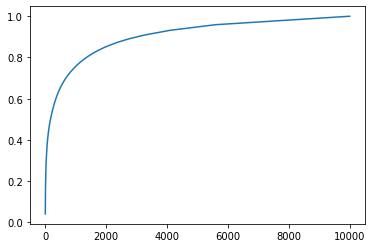

In [44]:
plt.plot([i+1 for i in range(len(cum_perc_values))], cum_perc_values)

In [13]:
test_df_init.columns

Index(['author', 'author_created_utc', 'author_fullname', 'created_utc',
       'crosspost_parent', 'crosspost_parent_list', 'id', 'num_comments',
       'score', 'selftext', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'title', 'permalink'],
      dtype='object')